In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Datasets

In [2]:
data_path = '../data/'

hour = pd.read_csv(data_path+'hour.csv')
day = pd.read_csv(data_path+'day.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour[['dteday','cnt']].groupby('dteday').sum().reset_index().head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


## Check Features

In [100]:
import seaborn as sns
sns.set()

In [49]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [92]:
cols = [col for col in day.columns if len(day[col].unique())<30]
cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

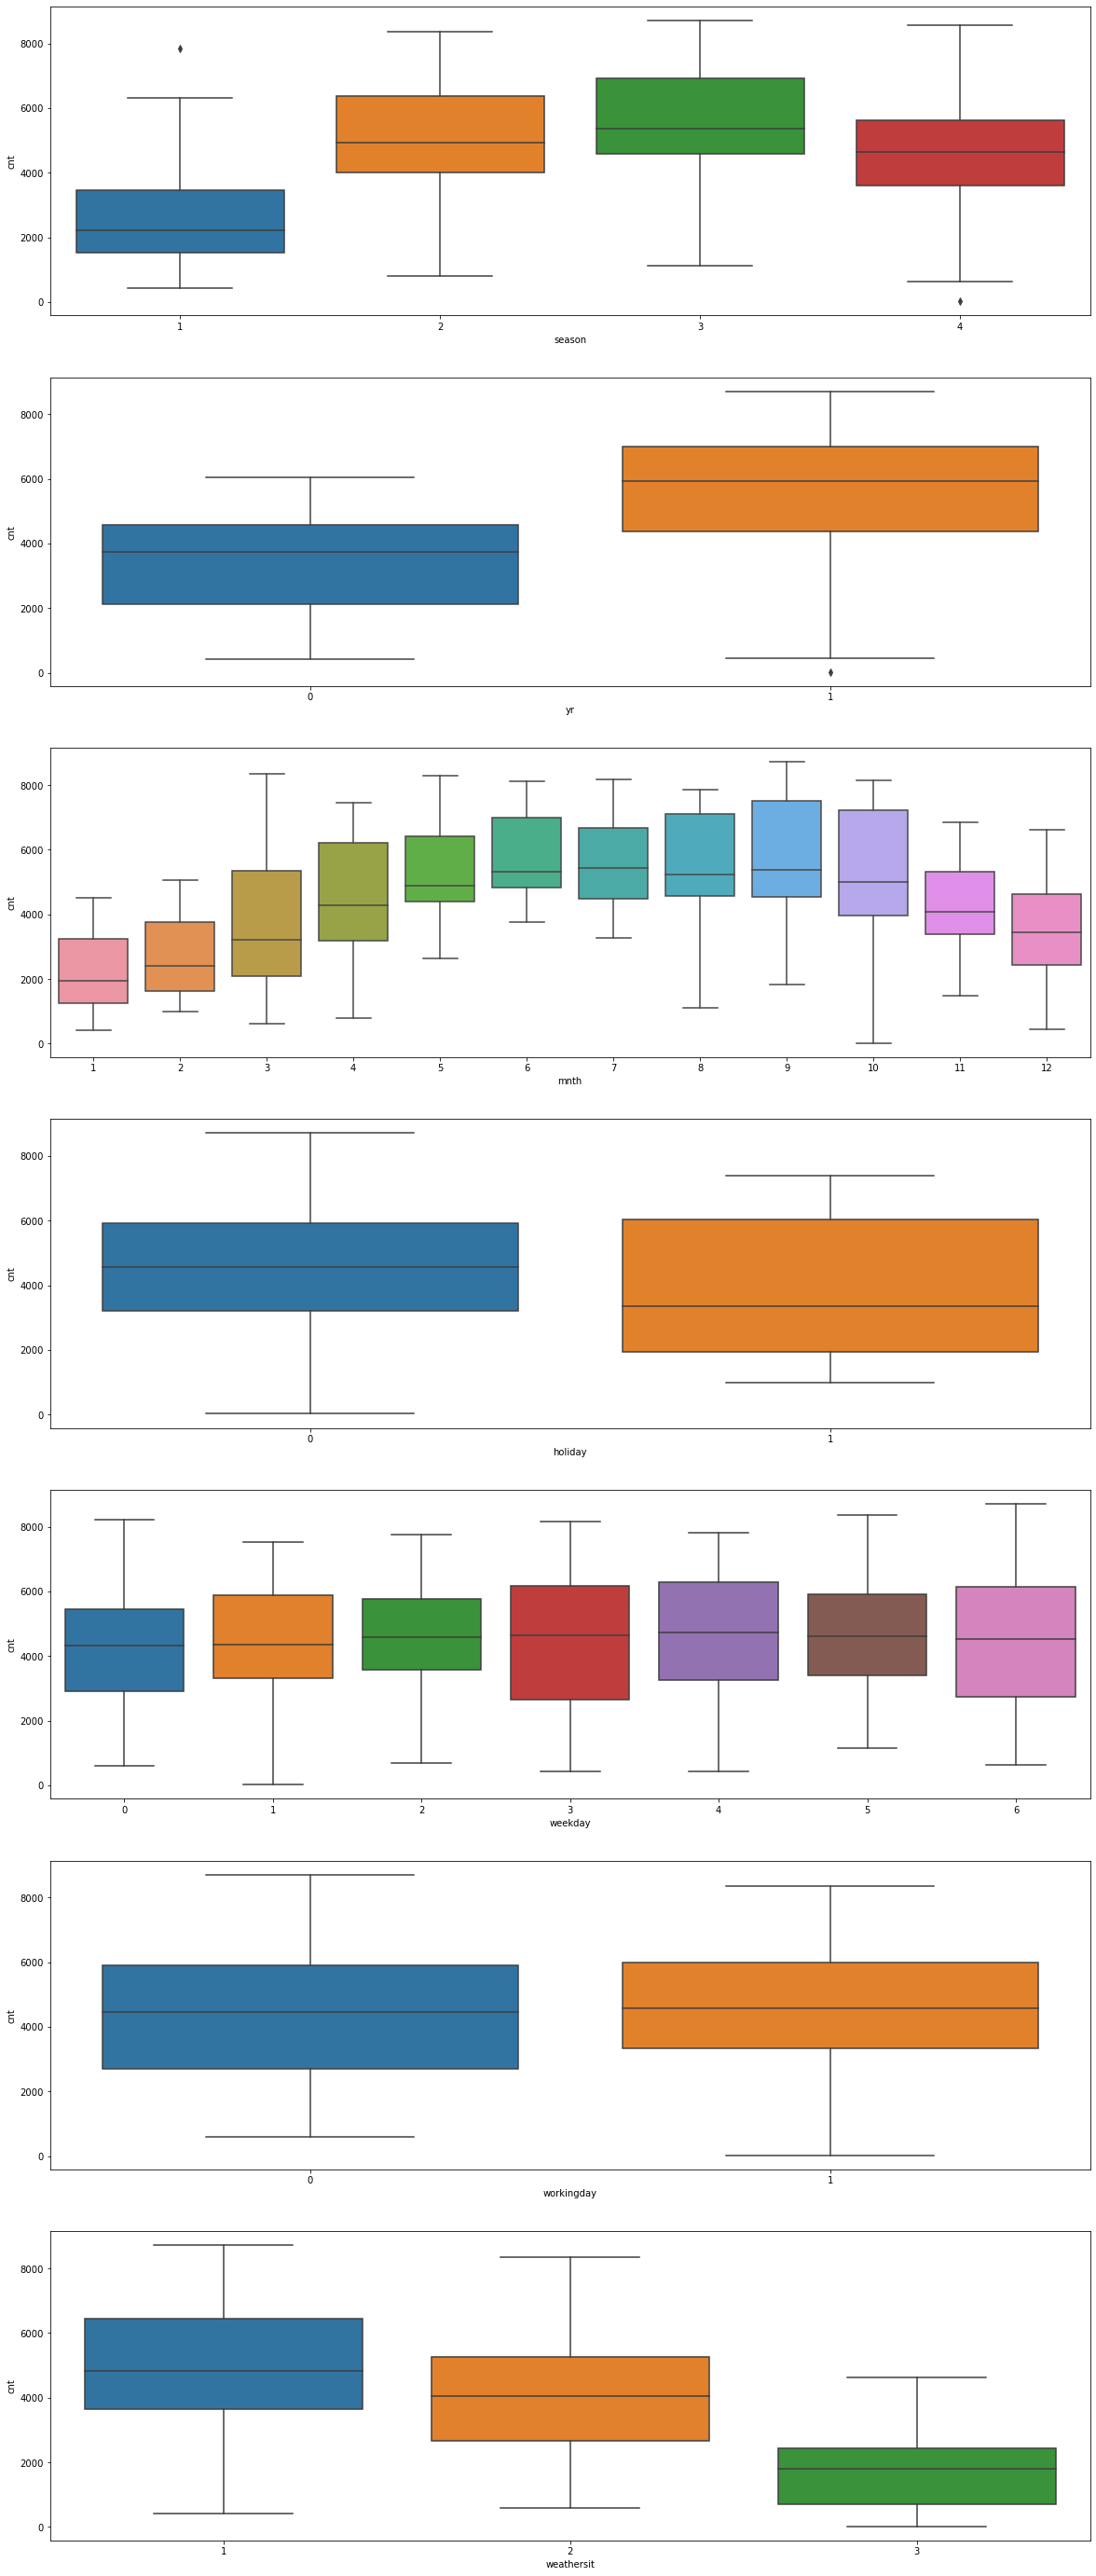

In [93]:
f, axes = plt.subplots(len(cols),figsize=[20,50])
k=0
for col in cols:
    _=sns.boxplot(x=col, y="cnt", data=day,ax=axes[k])
    k+=1

In [101]:
cols = [col for col in day.columns if len(day[col].unique())>30]

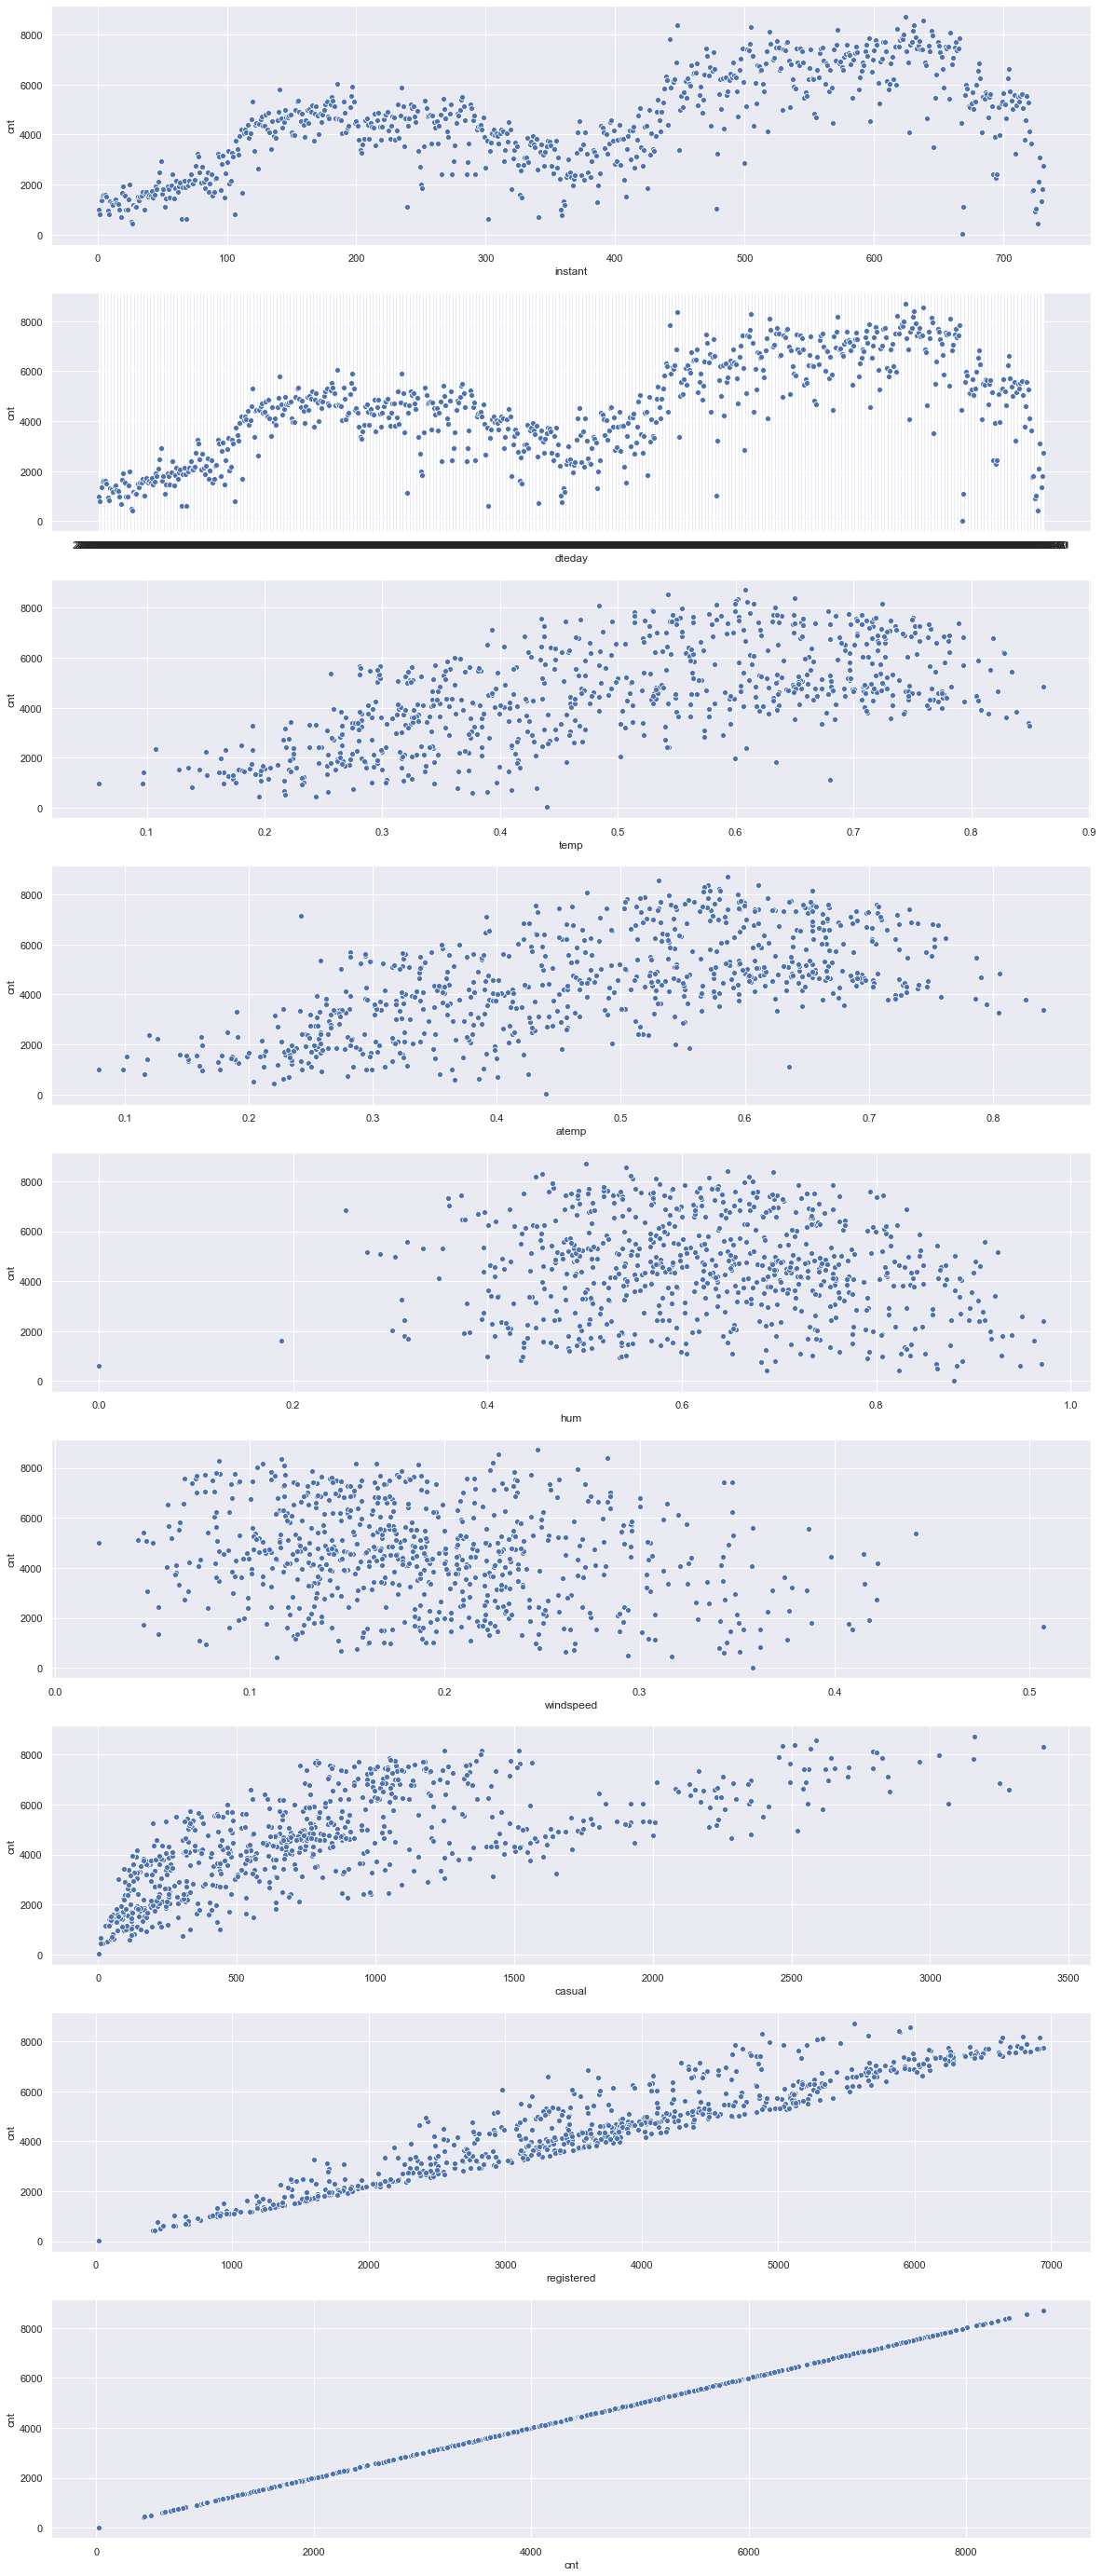

In [102]:
f, axes = plt.subplots(len(cols),figsize=[20,50])
k=0
for col in cols:
    _=sns.scatterplot(x=col, y="cnt", data=day,ax=axes[k])
    k+=1

 >Notes:
* instant and dteday seems to be corellated
* temp and atemp seems to be correlated
* hum seems like categorical feature: when it is below 0.4 there is almost no count and when it is above 0.4 it seems to be not affecting cnt.
* registered seems to be very related to the cnt

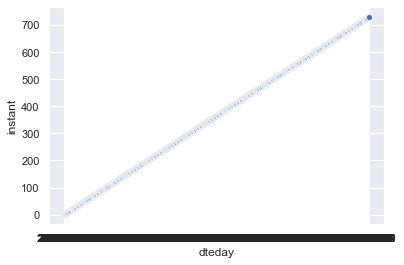

In [105]:
_=sns.scatterplot(x='dteday', y="instant", data=day)

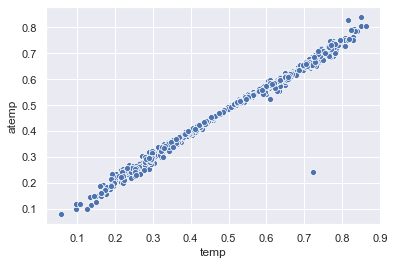

In [106]:
_=sns.scatterplot(x='temp', y="atemp", data=day)